<a href="https://colab.research.google.com/github/6306863958/Afame-Technologies/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install kaggle

In [23]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [24]:
!kaggle competitions download -c cifar-10  #  Kaggle. https://kaggle.com/competitions/cifar-10 # kaggle competitions download -c cifar-10

 98% 702M/715M [00:11<00:00, 137MB/s]
100% 715M/715M [00:11<00:00, 65.4MB/s]


In [25]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [26]:
import zipfile
zip_ref = zipfile.ZipFile('cifar-10.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [27]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [28]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.4 MB/s eta 0:00:00


In [29]:
  import py7zr
  archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
  archive.extractall()
  archive.close()

In [30]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

In [38]:
filesnames=os.listdir('/content/train')

In [39]:
len(filesnames)

50000

In [44]:
len("/content/trainLabels.csv")

24

In [46]:
print(filesnames[0:5])
print(filesnames[-5:])


['36397.png', '246.png', '7081.png', '5260.png', '19602.png']
['12173.png', '6259.png', '46901.png', '35055.png', '28477.png']


In [48]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [49]:
labels_df.shape

(50000, 2)

In [50]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [52]:
labels_df[labels_df['id']==36397] # firsrt image is frog

,id,label
36396,36397,frog


In [54]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [55]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

Convert all the label into number

In [59]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [62]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


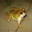

In [66]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/train/36397.png')
cv2_imshow(image)

In [68]:
labels_df[labels_df['id']==2] # firsrt image is frog

,id,label
1,2,truck


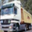

In [67]:
image=cv2.imread('/content/train/2.png')
cv2_imshow(image)

In [70]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [71]:
id_list=list(labels_df['id'])

In [73]:
print(id_list[:5])
print(id_list[-5:])


[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image processing

In [74]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [75]:
type(data)

list

In [76]:
len(data)

50000

In [77]:
data[0].shape

(32, 32, 3)

In [81]:
data[5] ,

(array([[[159, 102, 101],
         [150,  91,  95],
         [153,  95,  97],
         ...,
         [ 91,  71,  56],
         [ 74,  63,  55],
         [ 76,  58,  55]],
 
        [[142,  75,  68],
         [146,  72,  66],
         [155,  76,  65],
         ...,
         [127, 105,  71],
         [122, 111,  93],
         [ 86,  69,  61]],
 
        [[109,  67,  75],
         [ 99,  58,  60],
         [105,  59,  52],
         ...,
         [137, 112,  80],
         [163, 132, 105],
         [ 93,  72,  71]],
 
        ...,
 
        [[244, 129,  70],
         [240, 123,  65],
         [241, 122,  65],
         ...,
         [156,  42,  15],
         [179,  59,  26],
         [200,  73,  36]],
 
        [[246, 133,  74],
         [243, 128,  72],
         [243, 127,  70],
         ...,
         [162,  44,  14],
         [178,  56,  22],
         [192,  65,  27]],
 
        [[246, 139,  82],
         [243, 133,  78],
         [244, 132,  77],
         ...,
         [166,  47,  14],
  

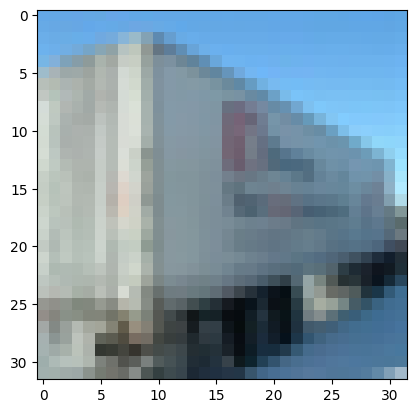

In [90]:
import matplotlib.pyplot as plt

# Assuming data[5] is a NumPy array representing the image
image_array = data[15]

# Display the image using Matplotlib
plt.imshow(image_array)
plt.axis('on')  # Hide the axis
plt.show()

In [89]:
labels[15]

9

In [91]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [92]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [94]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [95]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [96]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
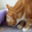

In [97]:
X_train[0]

In [98]:
import tensorflow as tf
from tensorflow import keras

In [99]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [100]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [101]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 8s 5ms/step - loss: 2.1052 - acc: 0.2141 - val_loss: 1.9562 - val_acc: 0.2688
Epoch 2/5
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9474 - acc: 0.2671 - val_loss: 1.8860 - val_acc: 0.2783
Epoch 3/5
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9073 - acc: 0.2812 - val_loss: 1.8928 - val_acc: 0.2800
Epoch 4/5
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8878 - acc: 0.2887 - val_loss: 1.8726 - val_acc: 0.2845
Epoch 5/5
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8796 - acc: 0.2895 - val_loss: 1.8843 - val_acc: 0.2822


In [103]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten , BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [104]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [105]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) # sice our shape is (32,32,3) but now shape is (64,64,3)
model.add(layers.UpSampling2D((2,2)))# now sahpe is (128,128,3)
model.add(layers.UpSampling2D((2,2)))#now shape is (256,256,3)=>UPsampling2d(2,2) meanse increse length and width by len*2 and width *2
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [106]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [108]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 451s 401ms/step - loss: 2.2067 - acc: 0.2026 - val_loss: 1.9586 - val_acc: 0.3125
Epoch 2/5
1125/1125 [==============================] - 452s 401ms/step - loss: 1.5176 - acc: 0.4433 - val_loss: 1.4413 - val_acc: 0.5017
Epoch 3/5
1125/1125 [==============================] - 450s 400ms/step - loss: 1.2722 - acc: 0.5549 - val_loss: 1.9466 - val_acc: 0.3605
Epoch 4/5
1125/1125 [==============================] - 442s 393ms/step - loss: 1.1231 - acc: 0.6134 - val_loss: 1.0535 - val_acc: 0.6340
Epoch 5/5
1125/1125 [==============================] - 451s 401ms/step - loss: 1.0239 - acc: 0.6526 - val_loss: 0.8205 - val_acc: 0.7042


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()